In [1]:
#import data and libraries (do this by using the 1001 button above to the right)

from io import StringIO
import requests
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Insert your data as a Pandas DataFrame

* Click on the cell below to highlight it.
* In the upper right of this notebook, click on `01/00` to open the Data tab, where you should see the `combined_data.csv` that you loaded earlier.
* Click on `Insert to code` -> `Insert Pandas DataFrame`
* Make sure that the data is called `df_data_1` and change it if it is not.

In [2]:
# @hidden_cell
# This function accesses a file in your Object Sto
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e4d75609fc03412bb5010f4da8f7e2a0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Mb8cJUSMRm__NjkdK_kOSotCjkeresVWUtz9_WadyWha',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e4d75609fc03412bb5010f4da8f7e2a0.get_object(Bucket='foodsecurity-donotdelete-pr-ujuci7icx7w4qw',Key='combined_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (208,209,211,214) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,FIPS,State,County,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
0,0,1001,AL,Autauga,18428.439685,33.769657,5344.427472,9.793530,4822.500269,8.837112,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
1,1,1003,AL,Baldwin,35210.814078,19.318473,9952.144027,5.460261,7916.131932,4.343199,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
2,2,1005,AL,Barbour,5722.305602,20.840972,3135.676086,11.420316,940.419327,3.425062,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
3,3,1007,AL,Bibb,1044.867327,4.559753,491.449066,2.144661,249.204753,1.087518,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432
4,4,1009,AL,Blount,1548.175559,2.700840,609.027708,1.062468,384.911607,0.671490,...,81.423484,104.052107,NaN,6.511603,0.0,129.670249,198.594827,121.172656,180.653472,23.432432


In [3]:
df_data_1.shape

(3262, 1244)

### Cleaning data and Exploring
We have explored the data set to understand the basic statistics and changed it according to our requirements.

In [4]:
df_data_1.columns

Index(['Unnamed: 0', 'FIPS', 'State', 'County', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10',
       'LACCESS_CHILD10', 'PCT_LACCESS_CHILD10',
       ...
       'CES_WATRPSCQ_std', 'CES_WATRPSPQ_std', 'CES_WELFAREB_std',
       'CES_WELFAREI_std', 'CES_WINDOWAC_std', 'CES_WOMGRLCQ_std',
       'CES_WOMGRLPQ_std', 'CES_WOMSIXCQ_std', 'CES_WOMSIXPQ_std',
       'CES_YRBUILT_std'],
      dtype='object', length=1244)

In [5]:
df_data_1.describe()

,Unnamed: 0,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
count,3262.000000,3262.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,...,2763.000000,2763.000000,1947.000000,2763.000000,2763.0,2763.000000,2763.000000,2763.000000,2763.000000,2681.000000
mean,1630.500000,31457.332925,20130.485391,23.540300,5541.030150,8.359188,4953.676750,5.502879,2677.821025,3.909622,...,69.546993,101.138452,1.353149,10.882370,0.0,121.350532,212.334189,106.390781,186.085924,26.350572
std,941.802616,16375.524971,51254.806435,20.231676,13849.378974,8.212651,13155.181390,4.875273,6519.993517,4.212330,...,10.964508,17.466676,0.890585,4.850197,0.0,26.669356,50.179029,28.662127,48.519222,6.232962
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,45.659691,54.544706,0.000000,0.000000,0.0,48.651029,112.399808,45.121029,80.583433,14.443555
25%,815.250000,19025.500000,1667.390111,10.870622,594.754831,3.432434,365.454006,2.402381,276.850179,1.571591,...,60.690423,93.305506,0.707107,9.020905,0.0,100.291943,180.070768,84.852601,157.478670,23.432432
50%,1630.500000,30038.000000,4111.042854,19.632762,1493.722478,6.144888,943.385306,4.439335,677.791776,2.821919,...,69.896994,99.236682,1.453463,10.442407,0.0,118.376545,209.956745,103.297270,180.653472,24.837942
75%,2445.750000,47006.500000,12919.813770,29.573087,4575.061517,10.318850,3005.860479,6.957564,1857.917995,4.505219,...,75.516632,110.731651,2.065591,14.550488,0.0,135.030235,232.887939,119.926255,217.244568,28.118544
max,3261.000000,72153.000000,886068.668386,100.000001,292541.789025,72.274456,260308.794094,34.015595,78922.918719,29.208633,...,106.552781,153.465998,2.638870,22.275774,0.0,200.919016,376.288907,189.674002,363.251444,54.306640


In [6]:
#to see columns distinctly and evaluate their state
df_data_1['PCT_LACCESS_POP10'].unique()

array([33.7696573 , 19.3184726 , 20.84097171, ..., 20.22041443,
       10.91540662, 17.20994869])

In [7]:
df_data_1['PCT_REDUCED_LUNCH10'].unique()

array([ 6.88610662,  5.54233978,  4.58214007, ..., 12.14804723,
       16.24668435,  7.57430489])

In [8]:
df_data_1['PCT_DIABETES_ADULTS10'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3232     True
3233     True
3234     True
3235     True
3236     True
3237     True
3238     True
3239     True
3240     True
3241     True
3242     True
3243     True
3244     True
3245     True
3246     True
3247     True
3248     True
3249     True
3250     True
3251     True
3252     True
3253     True
3254     True
3255     True
3256     True
3257     True
3258     True
3259     True
3260     True
3261     True
Name: PCT_DIABETES_ADULTS10, Length: 3262, dtype: bool

In [9]:
df_data_1['FOODINSEC_10_12'].isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3232     True
3233     True
3234     True
3235     True
3236     True
3237     True
3238     True
3239     True
3240     True
3241     True
3242     True
3243     True
3244     True
3245     True
3246     True
3247     True
3248     True
3249     True
3250     True
3251     True
3252     True
3253     True
3254     True
3255     True
3256     True
3257     True
3258     True
3259     True
3260     True
3261     True
Name: FOODINSEC_10_12, Length: 3262, dtype: bool

In [10]:
#looking at correlation in a table format
df_data_1.corr()

,Unnamed: 0,FIPS,LACCESS_POP10,PCT_LACCESS_POP10,LACCESS_LOWI10,PCT_LACCESS_LOWI10,LACCESS_CHILD10,PCT_LACCESS_CHILD10,LACCESS_SENIORS10,PCT_LACCESS_SENIORS10,...,CES_WATRPSCQ_std,CES_WATRPSPQ_std,CES_WELFAREB_std,CES_WELFAREI_std,CES_WINDOWAC_std,CES_WOMGRLCQ_std,CES_WOMGRLPQ_std,CES_WOMSIXCQ_std,CES_WOMSIXPQ_std,CES_YRBUILT_std
Unnamed: 0,1.000000,0.988077,-0.044663,0.046794,-0.038625,0.022513,-0.034837,0.042818,-0.066165,0.067212,...,-0.090276,-0.029702,0.494726,-0.130957,NaN,-0.041758,0.060190,0.040847,0.054743,0.124638
FIPS,0.988077,1.000000,-0.041895,0.043318,-0.035782,0.017944,-0.032581,0.039247,-0.062296,0.065611,...,-0.108750,-0.032423,0.493055,-0.132797,NaN,-0.057590,0.050669,0.016636,0.042205,0.129827
LACCESS_POP10,-0.044663,-0.041895,1.000000,0.053159,0.920129,-0.051210,0.992586,0.078428,0.951078,-0.036140,...,0.211475,0.189190,0.110039,0.112132,NaN,0.141888,0.163084,0.141098,0.158161,0.030863
PCT_LACCESS_POP10,0.046794,0.043318,0.053159,1.000000,0.058148,0.901876,0.051701,0.960261,0.059648,0.919669,...,0.078081,0.073386,-0.028346,0.029399,NaN,0.008136,0.135848,0.034067,0.145976,-0.130053
LACCESS_LOWI10,-0.038625,-0.035782,0.920129,0.058148,1.000000,0.014073,0.934088,0.087289,0.839824,-0.033301,...,0.152635,0.158271,0.097096,0.078706,NaN,0.080647,0.110861,0.078411,0.109655,-0.043724
PCT_LACCESS_LOWI10,0.022513,0.017944,-0.051210,0.901876,0.014073,1.000000,-0.046528,0.890063,-0.049752,0.826947,...,-0.015167,0.013740,-0.044804,-0.032070,NaN,-0.043802,0.052483,-0.036339,0.054818,-0.179561
LACCESS_CHILD10,-0.034837,-0.032581,0.992586,0.051701,0.934088,-0.046528,1.000000,0.086029,0.914988,-0.043977,...,0.194859,0.173740,0.111565,0.104240,NaN,0.136906,0.162738,0.135360,0.156621,0.017344
PCT_LACCESS_CHILD10,0.042818,0.039247,0.078428,0.960261,0.087289,0.890063,0.086029,1.000000,0.069079,0.823482,...,0.053151,0.050514,-0.042987,0.020719,NaN,0.006240,0.133672,0.025514,0.138429,-0.152206
LACCESS_SENIORS10,-0.066165,-0.062296,0.951078,0.059648,0.839824,-0.049752,0.914988,0.069079,1.000000,0.004796,...,0.243962,0.222335,0.093470,0.127424,NaN,0.137348,0.147420,0.138918,0.145248,0.049154
PCT_LACCESS_SENIORS10,0.067212,0.065611,-0.036140,0.919669,-0.033301,0.826947,-0.043977,0.823482,0.004796,1.000000,...,0.087898,0.079362,-0.033220,0.037170,NaN,-0.042446,0.091596,-0.005059,0.112250,-0.088942


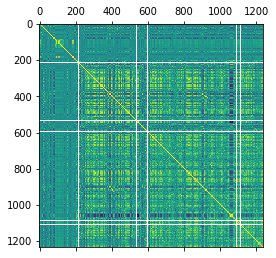

In [11]:
#checking out a correlation matrix with matplotlib
plt.matshow(df_data_1.corr())

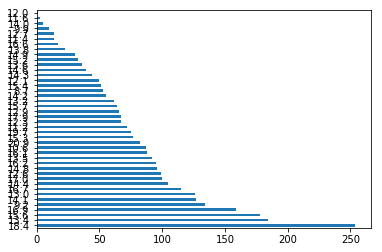

In [12]:
# Plot counts of a specified column using Pandas
df_data_1.FOODINSEC_10_12.value_counts().plot(kind='barh')

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


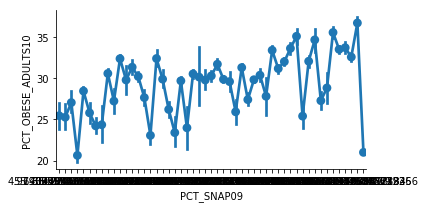

In [13]:
# Bar plot example
sns.factorplot("PCT_SNAP09", "PCT_OBESE_ADULTS10", data=df_data_1,size=3,aspect=2)

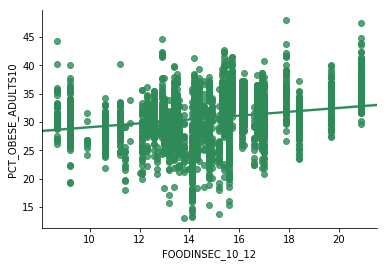

In [14]:
# Regression plot
sns.regplot("FOODINSEC_10_12", "PCT_OBESE_ADULTS10", data=df_data_1, robust=True, ci=95, color="seagreen")
sns.despine();

In [15]:
#create a dataframe of values that are most interesting to food insecurity
df_focusedvalues = df_data_1[["State", "County","PCT_REDUCED_LUNCH10", "PCT_DIABETES_ADULTS10", "PCT_OBESE_ADULTS10", "FOODINSEC_10_12", "PCT_OBESE_CHILD11", "PCT_LACCESS_POP10", "PCT_LACCESS_CHILD10", "PCT_LACCESS_SENIORS10", "SNAP_PART_RATE10", "PCT_LOCLFARM07", "FMRKT13", "PCT_FMRKT_SNAP13", "PCT_FMRKT_WIC13", "FMRKT_FRVEG13", "PCT_FRMKT_FRVEG13", "PCT_FRMKT_ANMLPROD13", "FOODHUB12", "FARM_TO_SCHOOL", "SODATAX_STORES11", "State_y", "GROC12", "SNAPS12", "WICS12", "PCT_NHWHITE10", "PCT_NHBLACK10", "PCT_HISP10", "PCT_NHASIAN10", "PCT_65OLDER10", "PCT_18YOUNGER10", "POVRATE10", "CHILDPOVRATE10"]]

In [16]:
#remove NaNs and 0s
df_focusedvalues = df_focusedvalues[(df_focusedvalues != 0).all(1)]
df_focusedvalues = df_focusedvalues.dropna(how='any')

In [17]:
#category of states
df_focusedvalues["State"].nunique()

9

In [18]:
#category of county
df_focusedvalues["County"].nunique()

16

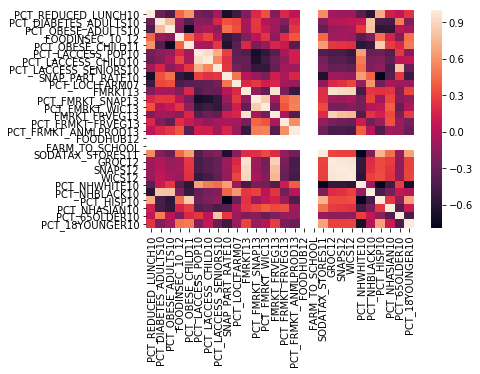

In [19]:
#heatmap of correlations with the dataframe to see what we should visualize
corr = df_focusedvalues.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can immediately see that a fair amount of strong correlations and relationships exist. Some of these include 18 and younger and Hispanic, an inverse relationship between Asian and obese, a correlation between sodatax and Hispanic, African American and obesity as well as food insecurity, sodatax and obese minors, farmers markets and aid such as WIC and SNAP, obese minors and reduced lunches and a few more.

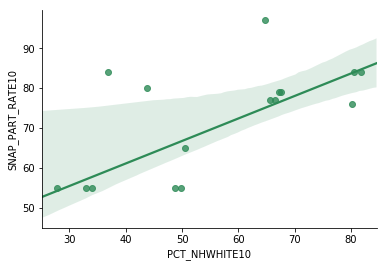

In [20]:
#Percent of the population that is white vs SNAP aid participation (positive relationship)
sns.regplot("PCT_NHWHITE10", "SNAP_PART_RATE10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

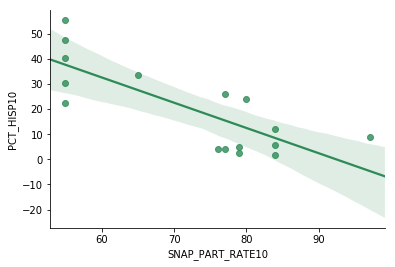

In [21]:
#Percent of the population that is Hispanic vs SNAP aid participation (negative relationship)
sns.regplot("SNAP_PART_RATE10", "PCT_HISP10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

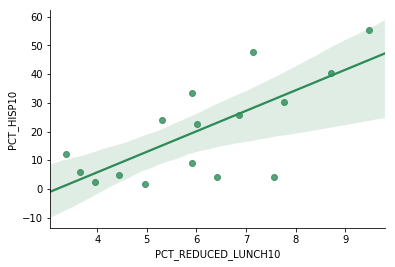

In [22]:
#Eligibility and use of reduced lunches in schools vs percent of the population that is Hispanic (positive relationship)
sns.regplot("PCT_REDUCED_LUNCH10", "PCT_HISP10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

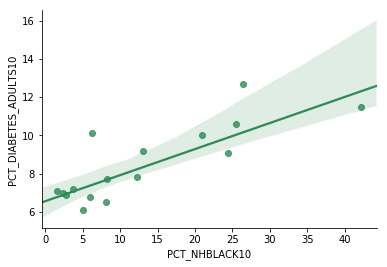

In [23]:
#Percent of the population that is black vs percent of the population with diabetes (positive relationship)
sns.regplot("PCT_NHBLACK10", "PCT_DIABETES_ADULTS10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();

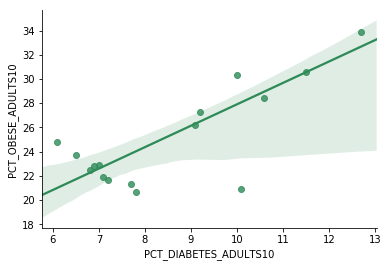

In [24]:
#Percent of population with diabetes vs percent of population with obesity (positive relationship)
sns.regplot("PCT_DIABETES_ADULTS10", "PCT_OBESE_ADULTS10", data=df_focusedvalues, robust=True, ci=95, color="seagreen")
sns.despine();